In [ ]:
!pip install "tensorflow-text"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 16.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      S

# Neural Machine Translation with Transformers

In the universe of natural language processing (NLP), text classification is a relatively simple task. At the opposite end of the difficulty spectrum lies neural machine translation (NMT), which uses deep learning to translate text from one language to another – for example, turning “Hello world” into “Salut le monde.” NMT has proven superior to the [rules-based machine translation](https://en.wikipedia.org/wiki/Rule-based_machine_translation) (RBMT) and [statistical machine translation](https://en.wikipedia.org/wiki/Statistical_machine_translation) (SMT) systems that predated the explosion of deep learning and today is the basis for virtually all state-of-the-art text-translation services. Let's use Keras and TensorFlow to build a transformer-based NMT model that translates English to French. This exercise requires [KerasNLP](https://pypi.org/project/keras-nlp/), so be sure to install it if it isn't installed already.

## Load and prepare the data

**en-fr.txt** is a subset of a [larger file](http://www.manythings.org/anki/fra-eng.zip) containing more than 190,000 phrases and their corresponding translations compiled as part of the [Tatoeba project](https://tatoeba.org/). The file is tab-delimited. Each line contains an English phrase, the equivalent French phrase, and an attribution identifying where the translation came from. We don’t need the attributions, so load the dataset into a Pandas DataFrame, remove the attribution column, and shuffle and reindex the rows.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/train.csv')

df.head()

,Unnamed: 0,indonesian,acehnese,banjarese,english,madurese,ngaju,sundanese,balinese,buginese,javanese,minangkabau,toba_batak
0,0,Nikmati cicilan 0% hingga 12 bulan untuk pemes...,Neumeuseunang ngon neubayeue bacut-bacut angsu...,Rasai cicilan 0% sampai 12 bulan gasan mamasan...,Enjoy 0% instalment for up to 12 months when o...,Nikmati cecelan 0% sampek 12 bulen ghebey pame...,Mengkeme angsuran nol% sampai due welas bulan...,Nikmati angsuran 0% dugi ka 12 bulan kanggo me...,Nikmati cicilan 0% kanti 12 bulan antuk pemesa...,pirasai cicilan 0% lettu 12 uleng ko mappesang...,Nikmatono cicilan 0% sampek 12 sasi dinggo pes...,Nikmati cicilan 0% sampai 12 bulan untuak pama...,atimi ciccilan 10% sahat 12 bulan tu panuhoran...
1,1,Kue-kue yang disajikan bikin saya bernostalgia...,Kueh nyang dihidang peuingat lon masa dilee. B...,Wadai wadai nang disurung maulah banustaltalgi...,The cakes give me massive nostalgia. Everythin...,Jejen-jejen se esadiye'eghi ghebey makerrong e...,Wadai wadai je inyedia nampae aku bernostalgia...,Kue anu disajikeun ngajantenkeun kuring nostal...,Jaje-jaje ne sane kasajiang ngaenang tiang ber...,beppa-beppa na taroe mapparingerrang. beppa ri...,Roti-roti sing disajekne nggarai aku nostalgia...,Kue-kue nan disajian mambuek awak takana masa ...,Kue-kue na diparade mambahen au taringot tu an...
2,2,Ibu pernah bekerja di grab indonesia,Ibu tom geukereuja bak Grab Indonesia,Mama suah bagawi di grab indonesia,Mom once worked for grab indonesia.,Emak pernah alako e grab indonesia,Umay puji begawi hong grab indonesia,Ibu kantos ngadamel di grab indonesia,Ibu naenang makarya ring grab Indonesia,pura emmakku ma'jama okko grab indonesia,Ibu uwis tahu kerja ing grab indonesia,Ibu pernah bakarajo di grab indonesia,Inong hea karejo di grab Indonesia.
3,3,Paling suka banget makan siang di sini ayam sa...,"Paleng galak ta pajoh bu leuho inoe, manok ngo...",Paling katuju banar makan siang disini ayam la...,"I love having lunch here the most, thanks to t...",Paleng senneng ongghu ngakan aban e dinna' aja...,Paling sanang tutu kuman bentuk andau hong het...,Pang resepna tuang beubeurangan di dieu hayam ...,Paling demen sajan ngajeng siang driki be siap...,Laipoji ladde' manre tangesso okkoe manu' siba...,Paling seneng banget mangan awan ing kene pith...,Paliang suko bana makan siang di siko ayam jo ...,Tung mansai lomo do roha mangan tonga ari diso...
4,4,Pelayanan bus DAMRI sangat baik,Peulayanan bus DAMRI cukop get,Palayanan bus DAMRI baik banar,The DAMRI Bus service is really good,Pelayanan bis DAMRI bhegus sarah,Pelayanan BUS Damri bahalap tutu,Palayanan beus DAMRI sae pisan,Pelayanan bus DAMRI luung pesan.,Appangaderenna bus DAMRI maka kanja',Pelayanane bis DAMRI apik banget.,Palayanan bus DAMRI sangaik elok,Panghobasion ni bus Damri mansai denggan.


In [ ]:
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['acehnese'])
df = df.drop(columns=['banjarese'])
df = df.drop(columns=['madurese'])
df = df.drop(columns=['ngaju'])
df = df.drop(columns=['sundanese'])
df = df.drop(columns=['buginese'])
df = df.drop(columns=['javanese'])
df = df.drop(columns=['minangkabau'])
df = df.drop(columns=['toba_batak'])
df = df.drop(columns=['english'])
df.head()

,indonesian,balinese
0,Nikmati cicilan 0% hingga 12 bulan untuk pemes...,Nikmati cicilan 0% kanti 12 bulan antuk pemesa...
1,Kue-kue yang disajikan bikin saya bernostalgia...,Jaje-jaje ne sane kasajiang ngaenang tiang ber...
2,Ibu pernah bekerja di grab indonesia,Ibu naenang makarya ring grab Indonesia
3,Paling suka banget makan siang di sini ayam sa...,Paling demen sajan ngajeng siang driki be siap...
4,Pelayanan bus DAMRI sangat baik,Pelayanan bus DAMRI luung pesan.


In [ ]:
df2 = pd.read_csv('/content/balinese.csv')

df2.head()

,Unnamed: 0,indonesian,balinese
0,0,abu,abu
1,1,abu,aon
2,2,abu,aon
3,3,abu,awu
4,4,adopsi,adopsi


In [ ]:
concatenated_df = pd.concat([df, df2], ignore_index=True)
concatenated_df.to_csv('gabungan.csv', index=False)

In [ ]:
df_gabungan = pd.read_csv('/content/gabungan.csv')
df_gabungan.head()

,indonesian,balinese,Unnamed: 0
0,Nikmati cicilan 0% hingga 12 bulan untuk pemes...,Nikmati cicilan 0% kanti 12 bulan antuk pemesa...,NaN
1,Kue-kue yang disajikan bikin saya bernostalgia...,Jaje-jaje ne sane kasajiang ngaenang tiang ber...,NaN
2,Ibu pernah bekerja di grab indonesia,Ibu naenang makarya ring grab Indonesia,NaN
3,Paling suka banget makan siang di sini ayam sa...,Paling demen sajan ngajeng siang driki be siap...,NaN
4,Pelayanan bus DAMRI sangat baik,Pelayanan bus DAMRI luung pesan.,NaN


Clean the text by removing punctuation symbols and numbers, converting characters to lowercase, and replacing Unicode characters with their ASCII equivalents. For the French samples, insert [start] and [end] tokens at the beginning and end of each phrase.

In [ ]:
import re
from unicodedata import normalize

def clean_text(text):
    text = normalize('NFD', text.lower())
    text = re.sub('[^A-Za-z ]+', '', text)
    return text

def clean_and_prepare_text(text):
    text = '[start] ' + clean_text(text) + ' [end]'
    return text

df_gabungan['indonesian'] = df_gabungan['indonesian'].apply(lambda row: clean_text(row))
df_gabungan['balinese'] = df_gabungan['balinese'].apply(lambda row: clean_and_prepare_text(row))
df_gabungan.head()

,indonesian,balinese,Unnamed: 0
0,nikmati cicilan hingga bulan untuk pemesanan...,[start] nikmati cicilan kanti bulan antuk pe...,NaN
1,kuekue yang disajikan bikin saya bernostalgia ...,[start] jajejaje ne sane kasajiang ngaenang ti...,NaN
2,ibu pernah bekerja di grab indonesia,[start] ibu naenang makarya ring grab indonesi...,NaN
3,paling suka banget makan siang di sini ayam sa...,[start] paling demen sajan ngajeng siang driki...,NaN
4,pelayanan bus damri sangat baik,[start] pelayanan bus damri luung pesan [end],NaN


The next step is to scan the phrases and determine the maximum length of the English phrases and then of the French phrases. These lengths will determine the lengths of the sequences input to and output from the model:

In [ ]:
ind = df_gabungan['indonesian']
bl = df_gabungan['balinese']

ind_max_len = max(len(line.split()) for line in ind)
bl_max_len = max(len(line.split()) for line in bl)
sequence_len = max(ind_max_len, bl_max_len)

print(f'Max phrase length (indo): {ind_max_len}')
print(f'Max phrase length (bali): {bl_max_len}')
print(f'Sequence length: {sequence_len}')

Max phrase length (indo): 77
Max phrase length (bali): 73
Sequence length: 77


Now fit one `Tokenizer` to the English phrases and another `Tokenizer` to their French equivalents, and generate padded sequences for all the phrases:

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

en_tokenizer = Tokenizer()
en_tokenizer.fit_on_texts(ind)
en_sequences = en_tokenizer.texts_to_sequences(ind)
en_x = pad_sequences(en_sequences, maxlen=sequence_len, padding='post')

fr_tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@\\^_`{|}~\t\n')
fr_tokenizer.fit_on_texts(bl)
fr_sequences = fr_tokenizer.texts_to_sequences(bl)
fr_y = pad_sequences(fr_sequences, maxlen=sequence_len + 1, padding='post')

Compute the vocabulary sizes from the Tokenizer instances:

In [ ]:
en_vocab_size = len(en_tokenizer.word_index) + 1
fr_vocab_size = len(fr_tokenizer.word_index) + 1

print(f'Vocabulary size (indo): {en_vocab_size}')
print(f'Vocabulary size (bali): {fr_vocab_size}')

Vocabulary size (indo): 3066
Vocabulary size (bali): 3790


Finally, create the features and the labels the model will be trained with. The features are the padded English sequences and the padded French sequences minus the [end] tokens. The labels are the padded French sequences minus the [start] tokens. Package the features in a dictionary so they can be input to a model that accepts multiple inputs.

In [ ]:
inputs = { 'encoder_input': en_x, 'decoder_input': fr_y[:, :-1] }
outputs = fr_y[:, 1:]

## Build and train a model

Now use Keras's functional API to define a model that includes a transformer encoder and a transformer decoder. The model accepts two inputs: padded English sequences for the encoder, and padded French sequences for the decoder. The output from the decoder is fed to a softmax output layer for classification.

In [ ]:
!pip install keras-nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.4/508.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 10.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from keras_nlp.layers import TokenAndPositionEmbedding, TransformerEncoder
from keras_nlp.layers import TransformerDecoder

np.random.seed(42)
tf.random.set_seed(42)

num_heads = 8
embed_dim = 512

encoder_input = Input(shape=(None,), dtype='int64', name='encoder_input')
x = TokenAndPositionEmbedding(en_vocab_size, sequence_len, embed_dim)(encoder_input)
encoder_output = TransformerEncoder(embed_dim, num_heads)(x)
encoded_seq_input = Input(shape=(None, embed_dim))

decoder_input = Input(shape=(None,), dtype='int64', name='decoder_input')
x = TokenAndPositionEmbedding(fr_vocab_size, sequence_len, embed_dim, mask_zero=True)(decoder_input)
x = TransformerDecoder(embed_dim, num_heads)(x, encoded_seq_input)
x = Dropout(0.4)(x)

decoder_output = Dense(fr_vocab_size, activation='softmax')(x)
decoder = Model([decoder_input, encoded_seq_input], decoder_output)
decoder_output = decoder([decoder_input, encoder_output])

model = Model([encoder_input, decoder_input], decoder_output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary(line_length=120)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Layer (type)                      ┃ Output Shape                 ┃           Param # ┃ Connected to              
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ encoder_input (InputLayer)        │ (None, None)                 │                 0 │ -                         
├───────────────────────────────────┼──────────────────────────────┼───────────────────┼───────────────────────────
│ token_and_position_embedding      │ (None, None, 512)            │         1,609,216 │ encoder_input[0][0]       
│ (TokenAndPositionEmbedding)       │                              │                   │                           
├───────────────────────────────────┼──────────────────────────────┼───────────────────┼───────────────────────────
│ decoder_input (InputLayer)        │ (None, None)                 │                 0 │ -                         
├───────────────────────────────────┼──────────────────────────────┼───────────────────┼───────────────────────────
│ transformer_encoder               │ (None, None, 512)            │         1,577,984 │ token_and_position_embeddi
│ (TransformerEncoder)              │                              │                   │                           
├───────────────────────────────────┼──────────────────────────────┼───────────────────┼───────────────────────────
│ functional_1 (Functional)         │ (None, None, 3790)           │         6,553,806 │ decoder_input[0][0],      
│                                   │                              │                   │ transformer_encoder[0][0] 
└───────────────────────────────────┴──────────────────────────────┴───────────────────┴───────────────────────────

 Total params: 9,741,006 (37.16 MB)

 Trainable params: 9,741,006 (37.16 MB)

 Non-trainable params: 0 (0.00 B)

Train the model, and use an `EarlyStopping` callback to end training if the validation accuracy fails to improve for three consecutive epochs:

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
hist = model.fit(inputs, outputs, epochs=50, validation_split=0.2, callbacks=[callback])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:857: UserWarning: Layer 'position_embedding' (of type PositionEmbedding) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:857: UserWarning: Layer 'query' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:857: UserWarning: Layer 'key' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.

40/40 ━━━━━━━━━━━━━━━━━━━━ 159s 4s/step - accuracy: 0.2353 - loss: 6.8891 - val_accuracy: 0.4973 - val_loss: 3.1079
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 195s 3s/step - accuracy: 0.4881 - loss: 5.4803 - val_accuracy: 0.0260 - val_loss: 3.3064
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 135s 3s/step - accuracy: 0.0816 - loss: 4.5167 - val_accuracy: 0.5875 - val_loss: 3.4255
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 151s 4s/step - accuracy: 0.1975 - loss: 3.5507 - val_accuracy: 0.0265 - val_loss: 3.4068
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.0990 - loss: 2.7769 - val_accuracy: 0.0244 - val_loss: 3.6047
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - accuracy: 0.1207 - loss: 2.3048 - val_accuracy: 0.0241 - val_loss: 3.6842


Plot the training and validation accuracy:

[]

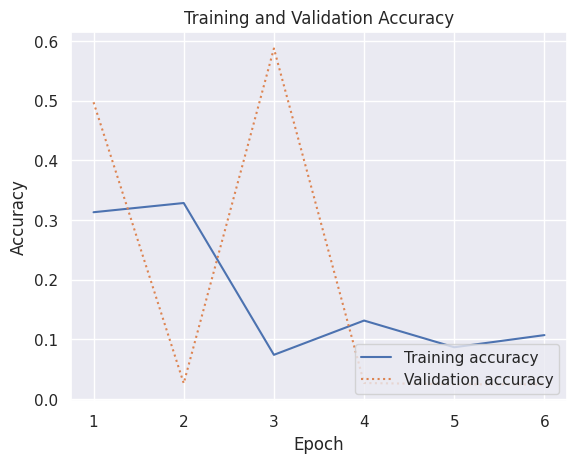

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

## Use the model to translate text

Can the model really translate English to French? Use a subset of the phrases reserved to validate the model to make predictions and see for yourself.

In [2]:
def translate_text(text, model, en_tokenizer, fr_tokenizer, fr_index_lookup, sequence_len):
    input_sequence = en_tokenizer.texts_to_sequences([text])
    padded_input_sequence = pad_sequences(input_sequence, maxlen=sequence_len, padding='post')
    decoded_text = '[start]'

    for i in range(sequence_len):
        target_sequence = fr_tokenizer.texts_to_sequences([decoded_text])
        padded_target_sequence = pad_sequences(target_sequence, maxlen=sequence_len, padding='post')[:, :-1]

        prediction = model([padded_input_sequence, padded_target_sequence])

        idx = np.argmax(prediction[0, i, :]) - 1
        token = fr_index_lookup[idx]
        decoded_text += ' ' + token

        if token == '[end]':
            break

    return decoded_text[8:-6] # Remove [start] and [end] tokens

fr_vocab = fr_tokenizer.word_index
fr_index_lookup = dict(zip(range(len(fr_vocab)), fr_vocab))
texts = ind[4:10].values

for text in texts:
    translated = translate_text(text, model, en_tokenizer, fr_tokenizer, fr_index_lookup, sequence_len)
    print(f'{text} => {translated}')

NameError: name 'fr_tokenizer' is not defined

In [ ]:
ind[4:6].values

array(['pelayanan bus damri sangat baik',
       'mau bikin postingan yang isinya mengedukasi customers gojek'],
      dtype=object)

Finally, see how the model translates "Hello world" into French:

In [ ]:
translate_text('tidur', model, en_tokenizer, fr_tokenizer, fr_index_lookup, sequence_len)

'korban'

The model isn't perfect, but it's not bad, either. The dataset that you trained with contains just 50,000 samples, but if you trained with millions of samples, you'd have the makings of a decent NMT model.